# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Image Thresholding
- cv2.threshold()
- cv2.adaptiveThreshold()

In [478]:
img = cv.imread("gradient.jpg", 1)

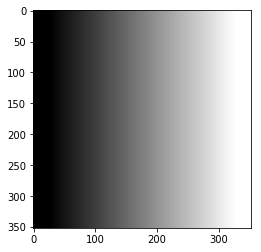

In [479]:
plt.imshow(img)

AxesSubplot(0.125,0.536818;0.227941x0.343182) Binary 0
AxesSubplot(0.398529,0.536818;0.227941x0.343182) Binary_Inv 1
AxesSubplot(0.672059,0.536818;0.227941x0.343182) Mask 7
AxesSubplot(0.125,0.125;0.227941x0.343182) Tozero 3
AxesSubplot(0.398529,0.125;0.227941x0.343182) Tozero_Inv 4
AxesSubplot(0.672059,0.125;0.227941x0.343182) Trunc 2


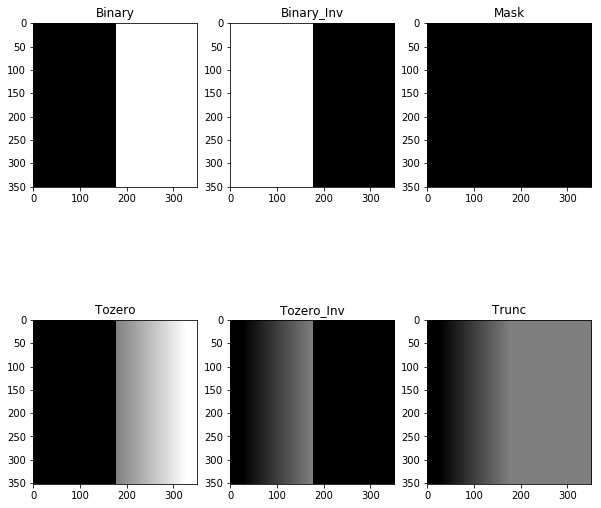

In [480]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes_lst = [a for ax in axes for a in ax]

for ax, name, thres in zip(axes_lst, ['Binary', 'Binary_Inv', 'Mask', 'Tozero', 'Tozero_Inv', 'Trunc'], [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_MASK, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV, cv.THRESH_TRUNC]):
    print(ax, name, thres)
    ret, th = cv.threshold(img, 127, 255, thres)
    ax.imshow(th)
    ax.set_title(name)

In [481]:
img = cv.imread("sudoku.jpg", 0)

In [482]:
img = cv.GaussianBlur(img, (5, 5), 0)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 7)
#ret, th2 = cv.threshold(th2, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 7)

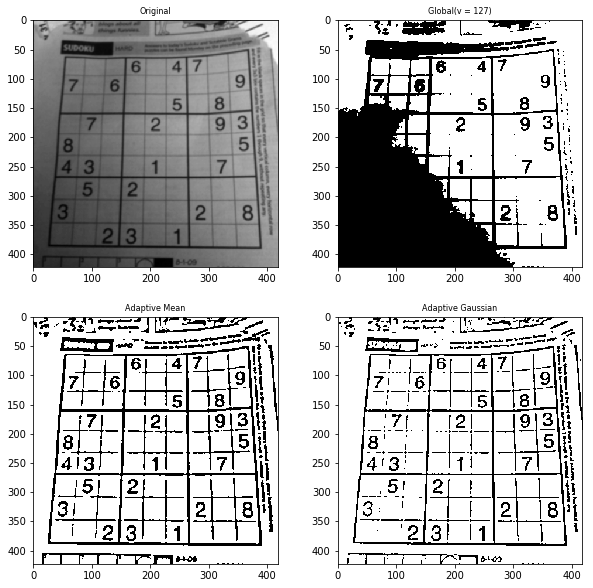

In [483]:
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, a in enumerate([a for ax in axes for a in ax]):
    a.imshow(images[i], 'gray')
    a.set_title(titles[i], fontsize=8)


### Ostu Thresholding

In [484]:
img = cv2.imread('noisy.jpg', 0)

# Noram
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Ostu
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# first gaussian blur, then Ostu
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

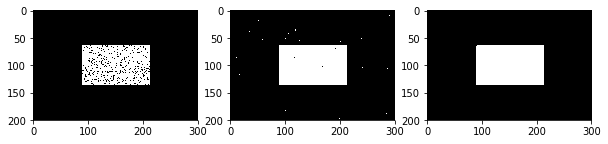

In [485]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(th1, 'gray')
axes[1].imshow(th2, 'gray')
axes[2].imshow(th3, 'gray')